In [ ]:
import numpy as np
import scipy as sc
import os
import pickle
import cv2
import scipy as sc
from skimage.transform import rescale
from scipy import ndimage
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
import pylab
import imageio
from math import *
import re
import shutil
%matplotlib inline

In [2]:
def im_resize(img, perc):
    return sc.misc.imresize(img, perc)
############################################################"
def list_dirs(path):
    files = []
    for name in os.listdir(path):
        if os.path.isdir(os.path.join(path, name)):
            files.append(os.path.join(path, name))
    ordered_files = sorted(files, key=lambda x: (int(re.sub('\D','',x)),x))
    return ordered_files
############################################################"
def list_files(path):
    files = []
    for name in sorted(os.listdir(path)):
        if os.path.isfile(os.path.join(path, name)):
            files.append(os.path.join(path, name))
    files = sorted(files, key=lambda x: (int(re.sub('\D','',x)),x))
    return files

############################################################"
def list_files_n(path):
    files = []
    for name in os.listdir(path):
        if os.path.isfile(os.path.join(path, name)):
            files.append(name)
    return files
##################################################################
def retrieveFrames(path_, name):
    vid = imageio.get_reader(path_,  'ffmpeg')

    for num in range(vid.get_length()):
        image = im_resize(vid.get_data(num), (50, 50))
        imageio.imwrite(name+'_%d.png' % num, image)

In [4]:
pat = 'OuluVS2_Data/'
phrases = {'1 7 3 5 1 6 2 6 6 7': 0, '4 0 2 9 1 8 5 9 0 4': 1, '1 9 0 7 8 8 0 3 2 8': 2, '4 9 1 2 1 1 8 5 5 1': 3,  
               '8 6 3 5 4 0 2 1 1 2': 4, '2 3 9 0 0 1 6 7 6 4': 5, '5 2 7 1 6 1 3 6 7 0':6, 
               '9 7 4 4 4 3 5 5 8 7': 7, '6 3 8 5 3 9 8 5 6 5': 8, '7 3 2 4 0 1 9 9 5 0': 9}
keys = phrases.keys()
name = 'Serie'

In [5]:
for p in range(10):
    if not os.path.exists(pat+name+str(p+1)):
        os.mkdir(pat+name+str(p+1))

In [18]:
#create empty folders
for p_idx, p in enumerate(persons):
    dirs = list_dirs(p+'/')
    files = list_files(dirs[0]+'/')
    dest = dest_path+'/s'+str(p_idx+1)+'/'
    if not os.path.exists(dest):
        os.mkdir(dest)
    for en, f in enumerate(files):
        if not os.path.exists(dest+'u'+str(en+1)):
            os.mkdir(dest+'u'+str(en+1))

In [6]:
path = 'Copped_mouth_digits/'
dest_path = 'Data_digits/'
persons = list_dirs(path)

In [8]:
%%time
#Extract frames from video
for p_idx, p in enumerate(persons):
    dirs = list_dirs(p+'/')
    files = list_files(dirs[0]+'/')
    for en, f in enumerate(files):
        name = 's'+str(p_idx+1)+'_'+'u'+str(en+1)
        retrieveFrames(f, dest_path+'/'+str('s'+str(p_idx+1)+'/'+'u'+str(en+1)+'/'+name))
        
print 'Extraction Finished!'

Extraction Finished!
CPU times: user 11min 8s, sys: 39.7 s, total: 11min 48s
Wall time: 15min 1s


In [39]:
min_ = 1000
max_ = 0
dirs = list_dirs(dest_path+'/')
for i, d in enumerate(dirs):
    sub_dirs = list_dirs(d+'/')
    for sd in sub_dirs:
        files = list_files_n(sd+'/')
        if len(files) < min_:
            min_ = len(files)
        if len(files) > max_:
            max_ = len(files)
print'Min : ', min_,'\t Max : ', max_

Min :  83 	 Max :  297


### Concatenate frames

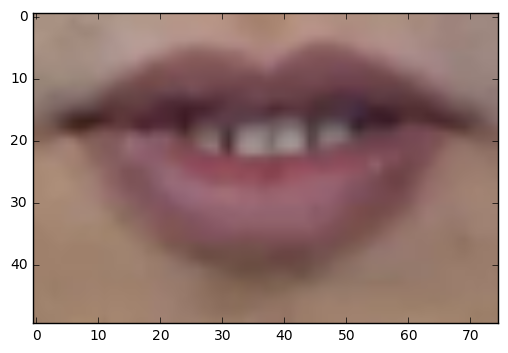

In [6]:
img = sc.misc.imread('Copped_mouth_digits/s1/u15/s1_u15_0.png')
im = im_resize(img, (60, 60))
plt.imshow(img)

In [9]:
%%time
def get_CFI():
    dirs = list_dirs(dest_path+'/')
    for n, d in enumerate(dirs):
        print d[-2:len(d)], ' - ',
        sub_dirs = list_dirs(d+'/')
        for cnt, sub in enumerate(sub_dirs):
            files = list_files(sub+'/')
            lgth = int(ceil(sqrt(len(files))))
            images = []
            for f in files:
                images.append(rgb2gray(sc.misc.imread(f)))
                
            last_im = images[len(images)-1]
            for x in range(len(images), int(pow(lgth, 2))):
                images.append(last_im)
                
            w = []
            j = 0
            for i in range(lgth):
                tmp = []
                for l in range(lgth):
                    tmp.append(images[j+l])
                w.append(np.concatenate((tmp), axis=1))
                j += lgth
            tmp2 = []
            for k in range(lgth):
                tmp2.append(w[k])
            image = np.concatenate((tmp2), axis=0)
            sc.misc.imsave(d+'/'+'s'+str(n+1)+'_u'+str(cnt+1)+'_.png' , image)
    print '\n::Concatenating finished!!'
get_CFI()

s1  -  s2  -  s3  -  s4  -  s5  -  s6  -  s7  -  s8  -  s9  -  10  -  11  -  12  -  13  -  14  -  15  -  16  -  17  -  18  -  19  -  20  -  21  -  22  -  23  -  24  -  25  -  26  -  27  -  28  -  29  -  30  -  31  -  32  -  33  -  34  -  35  -  36  -  37  -  38  -  39  -  40  -  41  -  42  -  43  -  44  -  45  -  46  -  47  -  48  -  49  -  50  -  51  -  52  -  53  -  Concatenating finished!!
CPU times: user 6min 54s, sys: 22.2 s, total: 7min 16s
Wall time: 7min 38s


In [10]:
path_ = 'OuluVS2_Digits/'
dir_name = 'Serie'

In [12]:
dirs = list_dirs(dest_path)
for d in dirs:
    cpt = 1
    files = list_files(d+'/')
    for j, f in enumerate(files):
        if j%3 == 0 and j>0:
            cpt += 1
        shutil.copy(f, path_+dir_name+str(cpt))

print 'Copying finished!'

Copying finished!


In [3]:
img = sc.misc.imread('OuluVS2_Digits/Serie1/s10_u1_.png')
print img.shape
print img.shape[0]

(650L, 975L)
650
